In [2]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, multilabel_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
import numpy as np
import csv
import os
import sklearn

In [4]:
adata.obs

,fov,Area,AspectRatio,CenterX_global_px,CenterY_global_px,Width,Height,Mean.MembraneStain,Max.MembraneStain,Mean.PanCK,...,Chromaffin cells,Endothelial cells,Bridge cells,Myofibroblasts,SCPs,Hepatocytes,Adrenal cortex,c2l_predicted,grouped_annotations,grouped_annotations2
3_1,1,10996,2.06,95170.997899,99963.034702,183,89,52,4561,37,...,0.022079,0.014064,0.018664,0.049447,0.008066,0.379096,0.007580,Hepatocytes,Hepatocytes,Hepatocytes
5_1,1,9341,0.82,95468.997899,99760.034702,102,124,332,2770,341,...,0.004491,0.260514,0.005809,0.006179,0.002537,0.002363,0.009135,Endothelial cells,Endothelial,Endothelial
6_1,1,4901,1.26,95379.997899,99721.034702,92,73,340,692,867,...,0.003808,0.006880,0.005062,0.023329,0.005377,0.004137,0.003001,Mesenchymal cells,Mesenchymal,Mesenchymal
7_1,1,8042,0.76,95249.997899,99688.034702,93,123,380,1287,618,...,0.001626,0.000617,0.003490,0.000467,0.000783,0.000718,0.001061,Mast cells,Myeloid cells,Immune cells
8_1,1,3137,0.72,95412.997899,99681.034702,63,87,569,1201,915,...,0.004909,0.071027,0.016800,0.002372,0.004232,0.098735,0.012663,Hepatocytes,Hepatocytes,Hepatocytes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471_202,202,4170,0.92,81967.003876,56219.283252,82,89,2288,14766,404,...,0.016062,0.017717,0.009285,0.002879,0.007724,0.020825,0.005900,Helper (CD4+) T cells,T cells,Immune cells
473_202,202,4561,1.39,82186.003876,56182.283252,97,70,3171,17822,511,...,0.042351,0.022897,0.047565,0.018309,0.011039,0.039606,0.031826,Macrophages/monocytes,Myeloid cells,Immune cells
474_202,202,6188,1.43,82094.003876,56138.283252,109,76,3346,16071,405,...,0.008449,0.001024,0.012531,0.024299,0.001637,0.001997,0.002771,Myofibroblasts,Myofibroblasts,Myofibroblasts
475_202,202,4717,1.08,81896.003876,56118.283252,81,75,2092,13187,438,...,0.067140,0.015154,0.007023,0.032707,0.054816,0.001814,0.003728,Chromaffin cells,Chromaffin,Sympathoadrenal


My annotations

In [ ]:
# My annotations
adata = sc.read_h5ad("/project/data/gew123/Spatial/Annotated_objects/spatial_c2l_labels_15neighbors.h5ad")
new_annotations = pd.DataFrame(adata.obs['grouped_annotations'])

In [31]:
new_annotations['barcode'] = new_annotations.index
new_annotations = new_annotations.rename(columns={'grouped_annotations': 'new_labels'})
new_annotations = new_annotations.reset_index(drop=True) 

In [32]:
new_annotations

,new_labels,barcode
0,Hepatocytes,3_1
1,Endothelial,5_1
2,Mesenchymal,6_1
3,Myeloid cells,7_1
4,Hepatocytes,8_1
...,...,...
182730,T cells,471_202
182731,Myeloid cells,473_202
182732,Myofibroblasts,474_202
182733,Chromaffin,475_202


Group annotations

In [43]:
adata = sc.read_h5ad('/project/data/nb24/Spatial_Analysis/jcp23/Py_Cell2location/cell2location_annotations_with_umap.h5ad')

In [68]:
adata.obs['grouped_annotations'].replace('T-cells', 'T cells', inplace=True)
adata.obs['grouped_annotations'].replace('B-cells', 'B cells', inplace=True)
adata.obs['grouped_annotations'].replace('Macrophages', 'Myeloid cells', inplace=True)

In [69]:
old_annotations = pd.DataFrame(adata.obs['grouped_annotations'])
old_annotations['barcode'] = old_annotations.index
old_annotations = old_annotations.rename(columns={'grouped_annotations': 'old_labels'})
old_annotations = old_annotations.reset_index(drop=True) 

In [64]:
old_annotations

0                  SCPs
1           Endothelial
2         Myofibroblast
3                  SCPs
4                  SCPs
              ...      
182730          T cells
182731      Macrophages
182732      Neuroblasts
182733      Neuroblasts
182734      Neuroblasts
Name: old_labels, Length: 182735, dtype: category
Categories (13, object): ['Adrenal cortex', 'B cells', 'Chromaffin', 'Endothelial', ..., 'Myofibroblast', 'Neuroblasts', 'SCPs', 'T cells']

In [70]:
# Perform left join
all_pred_df = pd.merge(new_annotations, old_annotations, on='barcode', how='left')
all_pred_df

,new_labels,barcode,old_labels
0,Hepatocytes,3_1,SCPs
1,Endothelial,5_1,Endothelial
2,Mesenchymal,6_1,Myofibroblast
3,Myeloid cells,7_1,SCPs
4,Hepatocytes,8_1,SCPs
...,...,...,...
182730,T cells,471_202,T cells
182731,Myeloid cells,473_202,Myeloid cells
182732,Myofibroblasts,474_202,Neuroblasts
182733,Chromaffin,475_202,Neuroblasts


In [71]:
new_labels = list(all_pred_df['new_labels'])
old_labels = list(all_pred_df['old_labels'])

Generate matrix

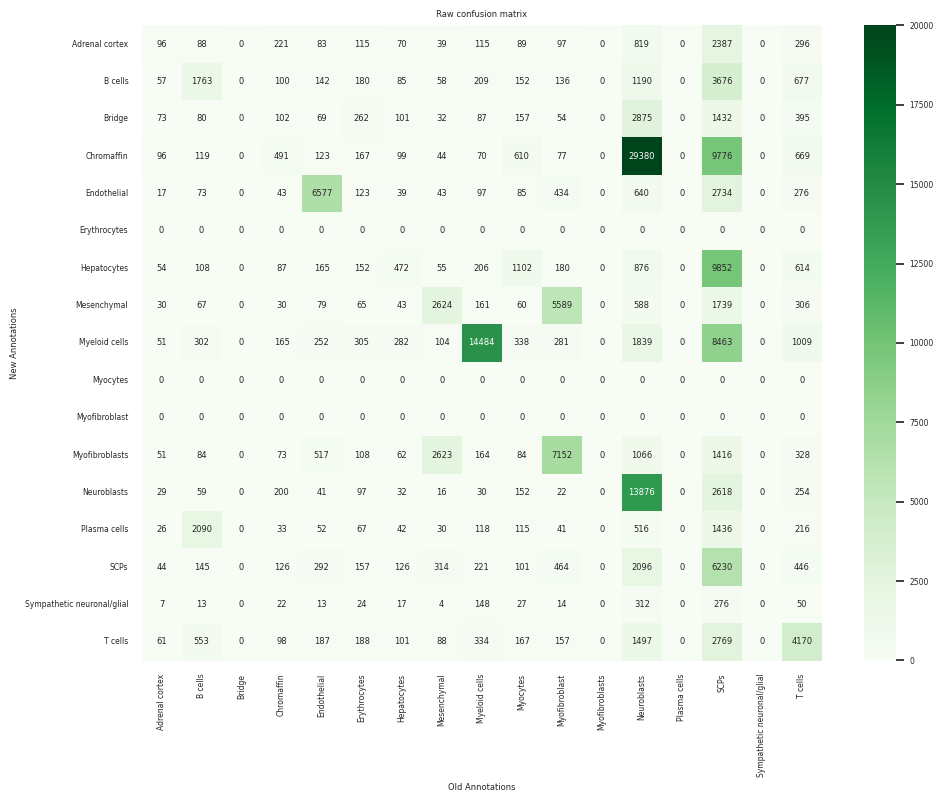

In [96]:
cm = confusion_matrix(new_labels, old_labels)
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.5)
sns.heatmap(cm, annot=True, fmt = 'd', cmap='Greens', xticklabels=sorted(set(old_labels) | set(new_labels)), yticklabels=sorted(set(old_labels) | set(new_labels)),vmin=0,vmax=20000)
plt.title('Raw confusion matrix')
plt.ylabel('New Annotations')
plt.xlabel('Old Annotations')
plt.tight_layout()
plt.savefig('/project/data/gew123/Spatial/Deconvolution/confusion_matrix_annotations.png')
plt.show()

## Generate confusion matrix for old annotations vs new
This is to investigate what hepatocyte annotations were relabelled to

New annotations

In [3]:
# Read in data
adata_final = sc.read_h5ad('/project/data/gew123/Spatial/Annotated_objects/spatial_annotated_final.h5ad')

In [23]:
# Format for matrix
new_annotations = pd.DataFrame(adata_final.obs['grouped_annotations'])
new_annotations['barcode'] = new_annotations.index
new_annotations = new_annotations.rename(columns={'grouped_annotations': 'new_labels'})
new_annotations = new_annotations.reset_index(drop=True) 

In [24]:
new_annotations

,new_labels,barcode
0,Myeloid cells,3_1
1,Endothelial,5_1
2,Mesenchymal,6_1
3,Myeloid cells,7_1
4,Endothelial,8_1
...,...,...
182730,T cells,471_202
182731,Myeloid cells,473_202
182732,Myofibroblasts,474_202
182733,SCPs,475_202


Old annotations

In [6]:
adata_old = sc.read_h5ad('/project/data/gew123/Spatial/Annotated_objects/Old/spatial_c2l_labels_15neighbors.h5ad')

In [ ]:
# Might need to edit labels:

In [25]:
old_annotations = pd.DataFrame(adata_old.obs['grouped_annotations'])
old_annotations['barcode'] = old_annotations.index
old_annotations = old_annotations.rename(columns={'grouped_annotations': 'old_labels'})
old_annotations = old_annotations.reset_index(drop=True) 

Merge

In [26]:
all_pred_df = pd.merge(new_annotations, old_annotations, on='barcode', how='left')

In [ ]:
old

In [27]:
new_labels = list(all_pred_df['new_labels'])
old_labels = list(all_pred_df['old_labels'])

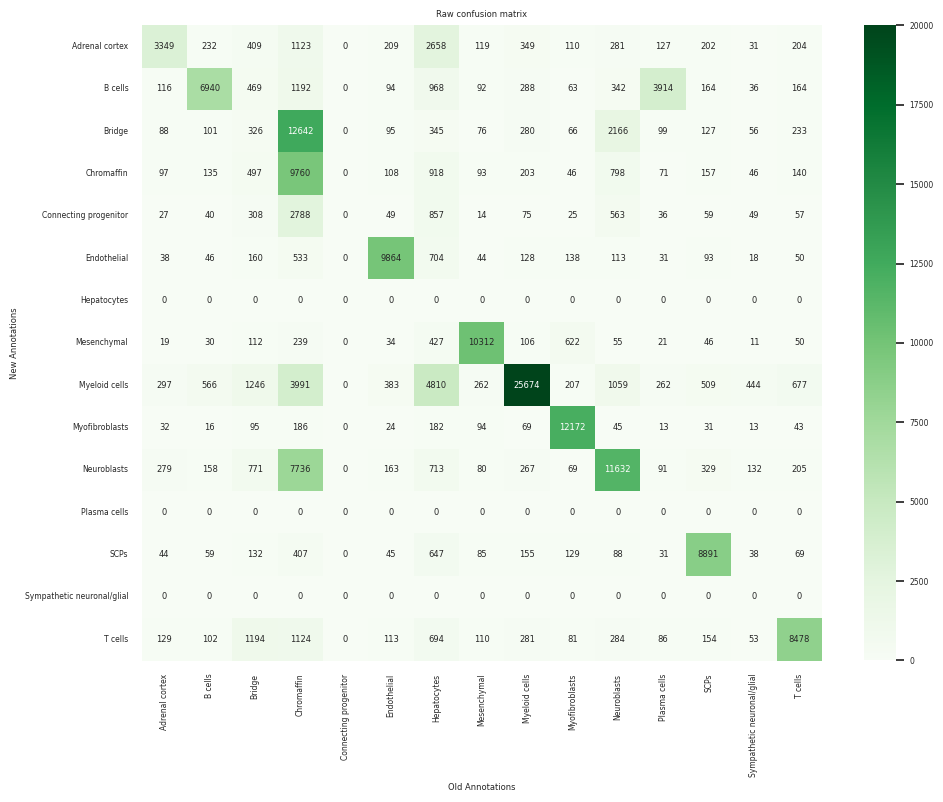

In [29]:
cm = confusion_matrix(new_labels, old_labels)
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.5)
sns.heatmap(cm, annot=True, fmt = 'd', cmap='Greens', xticklabels=sorted(set(old_labels) | set(new_labels)), yticklabels=sorted(set(old_labels) | set(new_labels)),vmin=0,vmax=20000)
plt.title('Raw confusion matrix')
plt.ylabel('New Annotations')
plt.xlabel('Old Annotations')
plt.tight_layout()
plt.savefig('/project/data/gew123/Spatial/Figures/annotation/confusion_matrix_annotations_broader.png')
plt.show()